## Background info
* Launched by Google in November 2015
* System used in Research, production and education
* Not the only DL-targetting system; Caffe, DL4J, Theano, Torch, ...
* License: Apache 2.0 open source license
* Under active development; currently at version 0.12.1
* Release details: https://github.com/tensorflow/tensorflow/blob/master/RELEASE.md
* Some releases add breaking changes :(, so you might find deprecated tutorials
* Runs on:
    * CPUs
    * GPUs (multiple GPU's on the same machine); both CPU and GPU at the same time
    * TPUs ([TPU Description](http://www.tomshardware.com/news/google-tensor-processing-unit-machine-learning,31834.html TPU Description))
        * TPU: ASIC
        ![Image](https://encrypted-tbn1.gstatic.com/images?q=tbn:ANd9GcS30EgpoCTLDhIgWJcs6nxMdwRpSlm5eiAOcK3-kLqnQotOEfSA)
* Resources:
    * Official site: https://www.tensorflow.org/
    * GitHub release: https://github.com/tensorflow/tensorflow; responsive community 
    * ML models ready to be used: https://github.com/tensorflow/models

* Main points:
    * solves the research/deployment dilemma: TF can be used for both (however, not the only model)
    * usable for: numerical computation (main target; linear algebra, pointwise function computation), ML (both shallow and deep architectures), calculus (auto-differentiation support added), ...
    * platforms: Linux, Windows
    * supported devices: [Android](https://github.com/tensorflow/tensorflow/tree/master/tensorflow/examples/android), Raspberry Pi 
    * written in C++, with C++ and Python bindings
    * **not** to provide out-of-the-box machine learning solutions, but `an extensive suite of functions and classes that allow users to define models from scratch mathematically`
        * hence: one has to kno ML internals to be able to implement (even classical) models
    * declarative approach: one defines the graph of computations

## Tensorflow components
* Tensorflow: the API, callable from C++ and Python
* TensorBoard: visual exploration of TF models; statistics, training analysis, debugging
* TensorFlow Serving: deployment of pre-trained TF models 

## TF Computation model
* Each model is a directed graph
    * nodes = operations
    * edges = number/matrices/**tensors**
    * Tensor: $k$-dimensional matrix; 
        * a scalar is a 0d tensor
        * a vector is a 1d tensor
        * a matrix is a 2d tensor
    [![Why do I need tensors?](http://img.youtube.com/vi/f5liqUk0ZTw/0.jpg)](https://www.youtube.com/watch?v=f5liqUk0ZTw "What's a Tensor?")
    * Tensor example: ![Tensor image](imgs/mnist_tensor.png)
    * Computation graph: ![title](imgs/graph1.png)    

## TF Installation
* Install Python 2.7/3.3+; Anaconda distribution works great for this
* Install TF:
    * [Main docu](https://www.tensorflow.org/versions/master/get_started/os_setup), e.g. with *installation environments* (recommended)
    * Install from sources, with Bazel
    * w/o GPU support, prebuilt binaries: 
    
    `pip install tensorflow`
    
    `pip install --proxy=194.138.0.3:9400 tensorflow`
    
    * with GPU support, CUDA compute capability 3.5+, [See CUDA list here](https://en.wikipedia.org/wiki/CUDA#), prebuilt binaries:
    
        `pip install tensorflow-gpu` 
        
        > there are pre-built binaries for TensorFlow with GPU support, but they require specific versions of NVIDIA software and are incompatible with future versions

## Demo 1: Generating random values in TF

In [1]:
#get matplotlib graphics to show up inline
%matplotlib inline 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
a = tf.random_normal([2, 100000], name='a')
print('a is:', type(a))

a is: <class 'tensorflow.python.framework.ops.Tensor'>


In [3]:
sess = tf.Session() #the hard work is done by a TF session
summary_writer = tf.summary.FileWriter('d:/temp/tensorboard/random_numbers', sess.graph)

In [4]:
out = sess.run(a) #evaluate the graph, that is: node 'a'
print('out is: ', type(out))
print("out's shape: ", out.shape)

out is:  <class 'numpy.ndarray'>
out's shape:  (2, 100000)


In [5]:
x, y = out

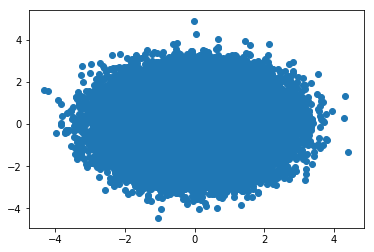

In [6]:
plt.scatter(x, y)
plt.show()

In [7]:
summary_writer.close()
sess.close() #release resources

## Demo 2: a simple graph + visualization in TensorBoard

![title](imgs/graph1.png)   

In [10]:
a = tf.constant(5, name="input_a")
b = tf.constant(3, name = "input_b")
c = tf.multiply(a, b, name = "multiply_a")
d = tf.add(a, b, name = "sum_d")
e = tf.add(c, d, name="add_e")
print(a)

Tensor("input_a_1:0", shape=(), dtype=int32)


In [11]:
sess = tf.Session()
writer = tf.summary.FileWriter('d:/temp/tensorboard/simple_graph', sess.graph)
sess.run(e)

23

In [12]:
writer.close()
sess.close()

To see the TF graph, run: 

```tensorboard --logdir=d:/temp/tensorboard/simple_graph```

If you want to see the graph directly in the notebook, see function show_graph in [DeepDreaming with TensorFlow]( http://nbviewer.jupyter.org/github/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb) notebook

### What if I want to merge the 2 input values into an 1d tensor? 

![title](imgs/graph2.png)  

In [13]:
a = tf.constant([5, 3], name="a_input")
b = tf.reduce_prod(a, name="b_prod")
c = tf.reduce_sum(a, name = "c_sum")
d = tf.add(b, c, name = "d_add")
sess = tf.Session()
writer = tf.summary.FileWriter('d:/temp/tensorboard/simple_graph_2', sess.graph)
sess.run(d)

23

## Demo: linear regression
Code: [https://www.tensorflow.org/get_started/](https://www.tensorflow.org/get_started/)

In [2]:
# Create 100 data points in NumPy, y = x * 0.1 + 0.3; the training dataset
x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 15 + 0.3

In [3]:
# Try to find values for W and b that compute y_data = W * x_data + b
# (We know that W should be 0.1 and b 0.3, but TensorFlow will
# figure that out for us.)
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name='W')
b = tf.Variable(tf.zeros([1]), name='b')
y = W * x_data + b
print(type(y))

<class 'tensorflow.python.framework.ops.Tensor'>


In [4]:
loss = tf.reduce_mean(tf.square(y - y_data, name='my_square'), name='my_loss')
print("loss type:\t", type(loss))

('loss type:\t', <class 'tensorflow.python.framework.ops.Tensor'>)


In [5]:
optimizer = tf.train.GradientDescentOptimizer(0.5, name='my_optimizer')
print("optimizer type:\t", type(optimizer))

('optimizer type:\t', <class 'tensorflow.python.training.gradient_descent.GradientDescentOptimizer'>)


In [6]:
train = optimizer.minimize(loss, name='my_train')
print("train type:\t", type(train))

('train type:\t', <class 'tensorflow.python.framework.ops.Operation'>)


In [7]:
init = tf.global_variables_initializer()
print("init type:\t", type(init))

('init type:\t', <class 'tensorflow.python.framework.ops.Operation'>)


In [8]:
# Launch the graph.
sess = tf.Session()
sess.run(init)
summary_writer = tf.summary.FileWriter('d:/temp/tensorboard/linear_regression', sess.graph)

In [9]:
# Fit the line.
for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

(0, array([ 5.91367912], dtype=float32), array([ 8.18579292], dtype=float32))
(20, array([ 11.95145702], dtype=float32), array([ 2.04640007], dtype=float32))
(40, array([ 14.09264183], dtype=float32), array([ 0.81979322], dtype=float32))
(60, array([ 14.72993755], dtype=float32), array([ 0.45470962], dtype=float32))
(80, array([ 14.91961956], dtype=float32), array([ 0.34604728], dtype=float32))
(100, array([ 14.97607613], dtype=float32), array([ 0.31370518], dtype=float32))
(120, array([ 14.99287891], dtype=float32), array([ 0.30407923], dtype=float32))
(140, array([ 14.99788094], dtype=float32), array([ 0.30121437], dtype=float32))
(160, array([ 14.99936867], dtype=float32), array([ 0.30036163], dtype=float32))
(180, array([ 14.99981213], dtype=float32), array([ 0.30010757], dtype=float32))
(200, array([ 14.99994469], dtype=float32), array([ 0.30003229], dtype=float32))
